In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(
    rc={'figure.figsize': (7,5)},
    style='whitegrid'
)
sns.set_style("ticks")

In [3]:
shipment = pd.read_csv('FreightShipmentDetails(All).csv')

C:\Users\jayth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
shipment

,ClientLadingNo,PickupDate,TOTALWEIGHT,status,TotalSellCost,TotalBuyCost,BuyFreight,BuyDiscount,BuyFule,CarrierCode,miles,Class
0,FRH30142,1/1/2019,218,6,135.12,135.12,157.03,-81.03,9.12,MTVL,0,85
1,FRH34471,1/1/2019,1,6,750.00,750.00,750.00,0.00,0.00,APGH,0,92
2,FRH35213,1/1/2019,18,6,46.87,46.87,46.87,0.00,0.00,FDEX,0,60
3,FRH35204,1/1/2019,531,6,300.84,300.84,300.84,0.00,0.00,FDEX,0,60
4,FRH35211,1/1/2019,366,6,302.09,302.09,302.09,0.00,0.00,FDEX,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...
175356,FRJ13489,12/22/2020 0:00,900,15,83.90,83.90,185.20,-109.27,7.97,DAFG,80,175
175357,FRJ10804,12/25/2020 0:00,1181,6,94.31,94.31,381.11,-292.56,5.76,FXFE,1388,55
175358,FRJ13426,12/28/2020 0:00,4250,15,1098.59,854.36,1540.20,-767.02,81.18,FXFE,1943,70
175359,FRJ10805,12/30/2020 0:00,1463,6,94.31,94.31,327.42,-238.87,5.76,FXFE,574,55


In [5]:
shipment.dtypes

ClientLadingNo     object
PickupDate         object
TOTALWEIGHT         int64
status              int64
TotalSellCost     float64
TotalBuyCost      float64
BuyFreight        float64
BuyDiscount       float64
BuyFule           float64
CarrierCode        object
miles               int64
Class              object
dtype: object

In [6]:
shipment['miles'] = shipment['miles'].astype('float64')

In [7]:
shipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175361 entries, 0 to 175360
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ClientLadingNo  175361 non-null  object 
 1   PickupDate      175361 non-null  object 
 2   TOTALWEIGHT     175361 non-null  int64  
 3   status          175361 non-null  int64  
 4   TotalSellCost   175361 non-null  float64
 5   TotalBuyCost    175361 non-null  float64
 6   BuyFreight      175361 non-null  float64
 7   BuyDiscount     175361 non-null  float64
 8   BuyFule         175361 non-null  float64
 9   CarrierCode     175361 non-null  object 
 10  miles           175361 non-null  float64
 11  Class           174898 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 16.1+ MB


In [8]:
shipment.isna().any()

ClientLadingNo    False
PickupDate        False
TOTALWEIGHT       False
status            False
TotalSellCost     False
TotalBuyCost      False
BuyFreight        False
BuyDiscount       False
BuyFule           False
CarrierCode       False
miles             False
Class              True
dtype: bool

In [9]:
shipment["Class"].isna().sum()

463

In [10]:
null_shipment = shipment[shipment["Class"].isna()]

In [11]:
null_shipment

,ClientLadingNo,PickupDate,TOTALWEIGHT,status,TotalSellCost,TotalBuyCost,BuyFreight,BuyDiscount,BuyFule,CarrierCode,miles,Class
1126,FRH31958,1/7/2019,21181,6,1325.00,1325.00,1325.0,0.00,0.00,PITD,0.0,NaN
1517,FRH32403,1/8/2019,29746,6,1525.00,1525.00,1525.0,0.00,0.00,PITD,0.0,NaN
4103,FRH35493,1/17/2019,206,6,69.75,69.75,83.2,-21.47,8.02,PITD,0.0,NaN
7374,FRH39391,1/30/2019,5500,6,1400.00,1400.00,1400.0,0.00,0.00,ABFS,0.0,NaN
7825,FRH40114,2/1/2019,640,6,748.89,748.89,0.0,-913.65,132.84,AVRT,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
172722,FRJ10549,12/3/2020,30000,6,420.00,420.00,420.0,0.00,0.00,AVRT,0.0,NaN
173431,FRJ11205,12/7/2020,30000,6,420.00,420.00,420.0,0.00,0.00,AVRT,0.0,NaN
174004,FRJ11918,12/9/2020,30000,6,420.00,420.00,420.0,0.00,0.00,AVRT,0.0,NaN
174567,FRJ12991,12/11/2020 0:00,30000,6,420.00,420.00,420.0,0.00,0.00,AVRT,0.0,NaN


In [12]:
null_shipment["CarrierCode"].value_counts()

AVRT    228
DAFG     55
SEFL     53
PITD     42
BTVP     32
ABFS     17
RLCA     14
AACT      5
FXFE      5
SAIA      4
ODFL      3
CNWY      2
FXNL      1
MIDW      1
HMES      1
Name: CarrierCode, dtype: int64

In [13]:
shipment["CarrierCode"].unique()

array(['MTVL', 'APGH', 'FDEX', 'TXDT', 'PITD', 'DAFG', 'HMES', 'AVRT',
       'AACT', 'TADS', 'WARD', 'ODFL', 'UPSC', 'BBFG', 'CLLQ', 'ABXP',
       'LMAT', 'FXFE', 'FXNL', 'RETL', 'CNWY', 'SEFL', 'ABFS', 'SAIA',
       'RLCA', 'KNAR', 'CGSI', 'SEKW', 'NEMF', 'MIDW', 'BTVP', 'RSTJ',
       'SBFI', 'JONS', 'MMAO', 'SAFE', 'CTYD', 'NTLF', 'RGNB', 'AVWS',
       'TAES', 'RDWY', 'UM5W', 'MTIN', 'BBRR', 'JNGV', 'FGDC', 'AMMF',
       'BDDI', 'UPSF', 'ICAO', 'MUSP', 'ASGY', 'KOFC', 'RBLT', 'FDCC',
       'UPSS', 'ESHI', 'QECM', 'LMEL', 'EJTI', 'REAY', 'PKDS', 'UPGF',
       'PFCR', 'TQYL', 'HWBR', 'TGDT', 'CRPS', 'RGLG', 'PAAF', 'PGAA',
       'OAKH', 'FXFC', 'GWYW', 'UNIS', 'DHLC', 'RDED', 'EXLA', 'MERC',
       'AMSA', 'FRAT', 'INFY', 'MULC', 'EPCI', 'POGC', 'RBXO', 'CQED',
       'GRRM', 'ROSI', 'ECCE', 'RDOS', 'ATIE', 'TPKE', 'DTIO', 'REIM',
       'ENDI', 'CECE', 'ECHS', 'JUNG', 'TAHE', 'RLKS', 'CRUS', 'NTKR',
       'RPKD', 'MMIX', 'HNRY', 'PYLE', 'HFAW', 'SGCW', 'SCNN', 'IELC',
      

In [14]:
shipment["Class"].fillna("50", inplace=True)

In [15]:
shipment.isna().any()

ClientLadingNo    False
PickupDate        False
TOTALWEIGHT       False
status            False
TotalSellCost     False
TotalBuyCost      False
BuyFreight        False
BuyDiscount       False
BuyFule           False
CarrierCode       False
miles             False
Class             False
dtype: bool

# EXLA plot

In [3]:
shipment = pd.read_csv('FreightShipmentDetails(All).csv')
shipment['miles'] = shipment['miles'].astype('float64')
shipment["Class"].fillna("50", inplace=True)

shipment.head(10)

shipment["PickupDate"] = pd.to_datetime(shipment["PickupDate"])
exla_shipment = shipment[shipment["CarrierCode"] == "EXLA"]

C:\Users\jayth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
exla_shipment

,ClientLadingNo,PickupDate,TOTALWEIGHT,status,TotalSellCost,TotalBuyCost,BuyFreight,BuyDiscount,BuyFule,CarrierCode,miles,Class
4642,FRH63742,2019-01-18,310,6,78.40,78.40,567.35,-497.35,8.40,EXLA,0.0,55
6214,FRH57775,2019-01-25,620,6,95.89,95.89,856.22,-770.60,10.27,EXLA,0.0,60
6293,FRH57795,2019-01-25,378,6,78.40,78.40,688.41,-618.41,8.40,EXLA,0.0,55
8856,FRH57796,2019-02-05,168,6,78.40,78.40,567.35,-497.35,8.40,EXLA,0.0,55
8857,FRH59569,2019-02-05,167,6,105.28,105.28,535.74,-441.74,11.28,EXLA,0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...
172192,FRJ12503,2020-12-01,193,6,124.32,124.32,111.00,0.00,13.32,EXLA,461.0,55
172197,FRJ13429,2020-12-01,841,6,209.37,209.37,209.37,0.00,0.00,EXLA,0.0,85
172252,FRJ12269,2020-12-01,1940,6,259.54,259.54,2896.60,-2664.87,27.81,EXLA,1387.0,50
172716,FRJ13985,2020-12-03,295,6,224.00,224.00,200.00,0.00,24.00,EXLA,2480.0,55


In [7]:
exla = exla_shipment.groupby("TOTALWEIGHT").aggregate({'TOTALWEIGHT': 'count', 'BuyFreight': 'sum', 
                                                'BuyDiscount': 'sum', 'BuyFule': 'sum'})

In [8]:
exla.rename(columns={'TOTALWEIGHT': 'Shipments'}, inplace=True)

In [9]:
exla

,Shipments,BuyFreight,BuyDiscount,BuyFule
TOTALWEIGHT,,,,
1,1,544.36,-217.74,76.76
44,1,591.14,-511.14,9.60
60,1,129.89,0.00,0.00
74,1,871.25,-655.25,51.84
83,1,174.87,-42.87,31.81
...,...,...,...,...
10140,1,7440.73,-6845.47,71.43
10241,1,7808.76,-7184.06,74.96
10510,1,10124.29,-8757.51,315.73


In [10]:
exla.loc['1000':]

,Shipments,BuyFreight,BuyDiscount,BuyFule
TOTALWEIGHT,,,,
44,1,591.14,-511.14,9.60
60,1,129.89,0.00,0.00
74,1,871.25,-655.25,51.84
83,1,174.87,-42.87,31.81
99,1,745.32,-665.32,9.60
...,...,...,...,...
10140,1,7440.73,-6845.47,71.43
10241,1,7808.76,-7184.06,74.96
10510,1,10124.29,-8757.51,315.73


In [33]:
exla.iloc[1:200]

,Shipments,BuyFreight,BuyDiscount,BuyFule
TOTALWEIGHT,,,,
44,1,591.14,-511.14,9.60
60,1,129.89,0.00,0.00
74,1,871.25,-655.25,51.84
83,1,174.87,-42.87,31.81
99,1,745.32,-665.32,9.60
...,...,...,...,...
335,3,2491.69,-2251.69,28.80
336,1,615.52,-535.52,9.60
339,1,794.44,-724.44,8.40


In [89]:
exla.loc[:200]

,Shipments,BuyFreight,BuyDiscount,BuyFule
TOTALWEIGHT,,,,
1,1,544.36,-217.74,76.76
44,1,591.14,-511.14,9.60
60,1,129.89,0.00,0.00
74,1,871.25,-655.25,51.84
83,1,174.87,-42.87,31.81
...,...,...,...,...
196,1,1619.00,-1440.91,21.37
197,3,747.35,-487.35,31.20
198,1,140.00,0.00,16.80


In [90]:
x = exla.loc[:200]["BuyFreight"].sum()
x

94816.84

In [91]:
y = exla.loc[:200]["BuyDiscount"].sum()
y

-75431.13

In [64]:
abs(y)

75431.13

In [53]:
ans = 75431.13 / 94816.84
ans

0.7955457068596676

In [92]:
z = exla.loc[:200]["BuyFule"].sum()
z

2672.4300000000003

In [55]:
ans1 = z / x
ans1

0.028185183138353907

In [93]:
my_df = pd.DataFrame({'Freight': x, 'Discount': y, 'Discount (%)': ans, 'Fuel': z, 'Fuel (%)': ans1},
                     index=['0-200'])

In [94]:
my_df

,Freight,Discount,Discount (%),Fuel,Fuel (%)
0-200,94816.84,-75431.13,0.795546,2672.43,0.028185


In [95]:
bins = [200, 500, 1000, 1500, 2500]
print(list(enumerate(bins)))

[(0, 200), (1, 500), (2, 1000), (3, 1500), (4, 2500)]


In [11]:
def segment_df(df):
    bins = [200, 500, 1000, 1500, 2500]
    total_shipments = []
    total_freight = []
    total_discount = []
    total_discount_per = []
    total_fuel = []
    total_fuel_per = []
    n = 0
    while n < len(bins):
        if n == 0:
            shipments = df.loc[:bins[n]]["Shipments"].sum()
            freight = df.loc[:bins[n]]["BuyFreight"].sum()
            discount = df.loc[:bins[n]]["BuyDiscount"].sum()
            discount_per = round((abs(discount) / freight) * 100, 2)
            fuel = df.loc[:bins[n]]["BuyFule"].sum()
            fuel_per = round((fuel / freight) * 100, 2)
        elif n == len(bins) - 1:
            shipments = df.loc[bins[n]+1:]["Shipments"].sum()
            freight = df.loc[bins[n]+1:]["BuyFreight"].sum()
            discount = df.loc[bins[n]+1:]["BuyDiscount"].sum()
            discount_per = round((abs(discount) / freight) * 100, 2)
            fuel = df.loc[bins[n]+1:]["BuyFule"].sum()
            fuel_per = round((fuel / freight) * 100, 2)
        else:
            shipments = df.loc[bins[n-1]+1:bins[n]]["Shipments"].sum()
            freight = df.loc[bins[n-1]+1:bins[n]]["BuyFreight"].sum()
            discount = df.loc[bins[n-1]+1:bins[n]]["BuyDiscount"].sum()
            discount_per = round((abs(discount) / freight) * 100, 2)
            fuel = df.loc[bins[n-1]+1:bins[n]]["BuyFule"].sum()
            fuel_per = round((fuel / freight) * 100, 2)
        total_shipments.append(shipments)
        total_freight.append(freight)
        total_discount.append(discount)
        total_discount_per.append(discount_per)
        total_fuel.append(fuel)
        total_fuel_per.append(fuel_per)
        n = n + 1
    
    weight_bins_df = pd.DataFrame({'Shipments': total_shipments,'Freight': total_freight, 'Discount': total_discount, 'Discount (%)': total_discount_per, 
                                   'Fuel': total_fuel, 'Fuel (%)':  total_fuel_per},
                                  index=[f"0-{bins[0]}", f"{bins[0]}-{bins[1]}", f"{bins[1]}-{bins[2]}", f"{bins[2]}-{bins[3]}", f"{bins[4]}-All"])
    
    return weight_bins_df

In [12]:
segment_df(exla)

,Shipments,Freight,Discount,Discount (%),Fuel,Fuel (%)
0-200,197,94816.84,-75431.13,79.55,2672.43,2.82
200-500,570,374452.52,-321532.04,85.87,7637.94,2.04
500-1000,182,208664.32,-186258.12,89.26,3193.25,1.53
1000-1500,67,112190.37,-98816.65,88.08,2431.47,2.17
2500-All,79,421125.27,-373117.76,88.60,7874.53,1.87


In [13]:
exla.loc[201:500].sum()

Shipments         570.00
BuyFreight     374452.52
BuyDiscount   -321532.04
BuyFule          7637.94
dtype: float64

In [101]:
exla.loc[1001:1500].sum()

Shipments          67.00
BuyFreight     112190.37
BuyDiscount    -98816.65
BuyFule          2431.47
dtype: float64

In [14]:
weight_bins = segment_df(exla)

In [15]:
weight_bins = weight_bins.reset_index().rename(columns={'index': 'Weights'})

In [16]:
weight_bins

,Weights,Shipments,Freight,Discount,Discount (%),Fuel,Fuel (%)
0,0-200,197,94816.84,-75431.13,79.55,2672.43,2.82
1,200-500,570,374452.52,-321532.04,85.87,7637.94,2.04
2,500-1000,182,208664.32,-186258.12,89.26,3193.25,1.53
3,1000-1500,67,112190.37,-98816.65,88.08,2431.47,2.17
4,2500-All,79,421125.27,-373117.76,88.60,7874.53,1.87


C:\Users\jayth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  This is separate from the ipykernel package so we can avoid doing imports until


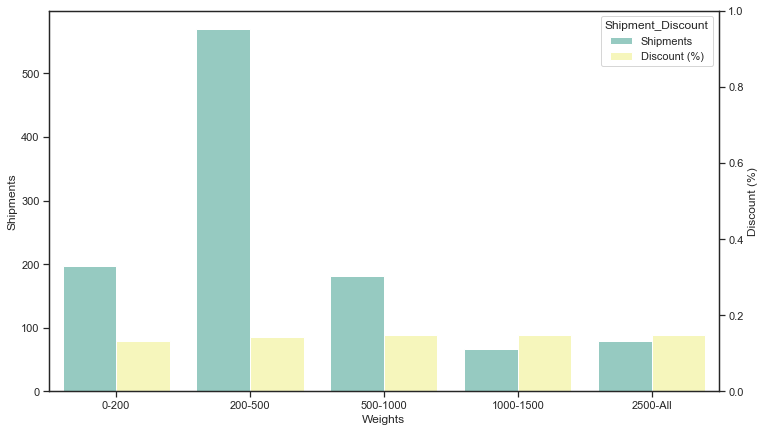

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))
df = weight_bins.melt(id_vars=['Weights'], value_vars=['Shipments', 'Discount (%)'], var_name='Shipment_Discount',
                      value_name='Shipments')
sns.barplot(data=df, x='Weights', y='Shipments', hue='Shipment_Discount', palette='Set3', ax=ax);
ax1 = ax.twinx()
ax1.set_ylabel('Discount (%)');

In [18]:
weight_bins.set_index('Weights', inplace=True)

In [19]:
weight_bins

,Shipments,Freight,Discount,Discount (%),Fuel,Fuel (%)
Weights,,,,,,
0-200,197,94816.84,-75431.13,79.55,2672.43,2.82
200-500,570,374452.52,-321532.04,85.87,7637.94,2.04
500-1000,182,208664.32,-186258.12,89.26,3193.25,1.53
1000-1500,67,112190.37,-98816.65,88.08,2431.47,2.17
2500-All,79,421125.27,-373117.76,88.60,7874.53,1.87


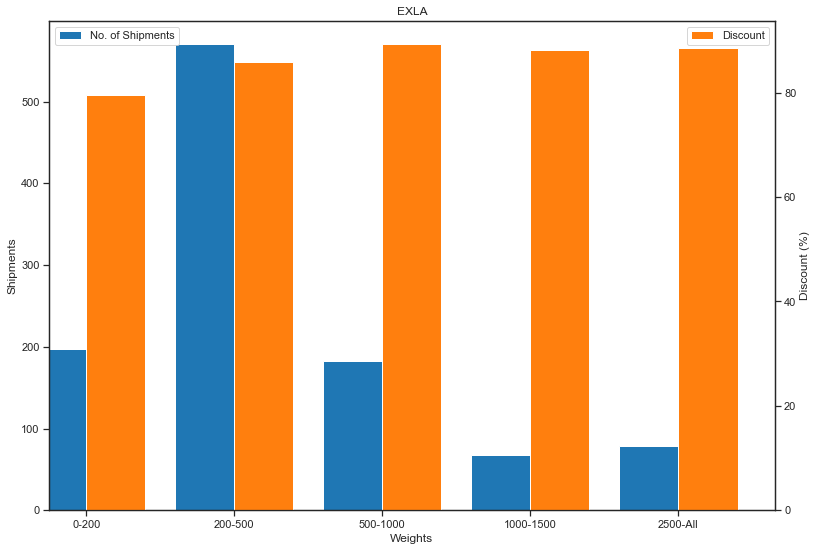

In [20]:
fig, ax = plt.subplots(figsize=(13, 9))
weight_bins["Shipments"].plot(kind='bar', color='tab:blue', width=0.4, position=1 ,ax=ax, rot=0, label='No. of Shipments')
ax1 = ax.twinx()
weight_bins["Discount (%)"].plot(kind='bar', color='tab:orange', width=0.4, position=0 ,ax=ax1, rot=0, label='Discount')
ax.set_ylabel('Shipments');
ax1.set_ylabel('Discount (%)');
ax.set_title("EXLA")
ax.legend(loc=2);
ax1.legend();
plt.savefig('Charts-2/discount.png');

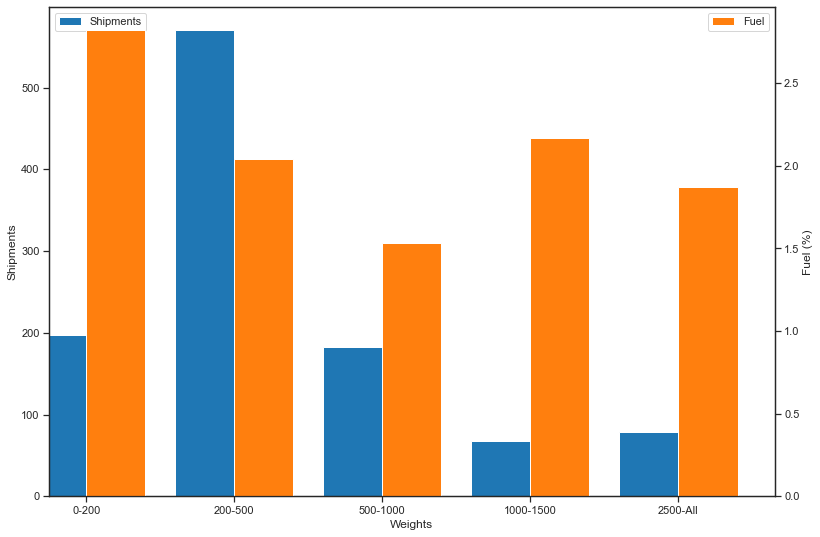

In [21]:
fig, ax = plt.subplots(figsize=(13, 9))
weight_bins["Shipments"].plot(kind='bar', color='tab:blue', width=0.4, position=1 ,ax=ax, rot=0, label='Shipments')
ax1 = ax.twinx()
weight_bins["Fuel (%)"].plot(kind='bar', color='tab:orange', width=0.4, position=0 ,ax=ax1, rot=0, label='Fuel')
ax.set_ylabel('Shipments');
ax1.set_ylabel('Fuel (%)');
ax.set_title("EXLA")
ax.legend(loc=2);
ax1.legend();
plt.savefig('Charts-2/fuel.png');

# DAFG

In [26]:
shipment = pd.read_csv('FreightShipmentDetails(All).csv')
shipment['miles'] = shipment['miles'].astype('float64')
shipment["Class"].fillna("50", inplace=True)

shipment.head(10)

shipment["PickupDate"] = pd.to_datetime(shipment["PickupDate"])
exla_shipment = shipment[shipment["CarrierCode"] == "DAFG"]
exla = exla_shipment.groupby("TOTALWEIGHT").aggregate({'TOTALWEIGHT': 'count', 'BuyFreight': 'sum', 
                                                'BuyDiscount': 'sum', 'BuyFule': 'sum'})
exla.rename(columns={'TOTALWEIGHT': 'Shipments'}, inplace=True)

weight_bins = segment_df(exla)
weight_bins = weight_bins.reset_index().rename(columns={'index': 'Weights'})
weight_bins.set_index('Weights', inplace=True)

C:\Users\jayth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
weight_bins

,Shipments,Freight,Discount,Discount (%),Fuel,Fuel (%)
Weights,,,,,,
0-200,6766,577315.24,-102755.87,17.80,55034.78,9.53
200-500,7270,681227.52,-209100.86,30.69,57080.27,8.38
500-1000,3341,509561.07,-259635.82,50.95,29413.90,5.77
1000-1500,1720,391670.95,-234538.25,59.88,17855.89,4.56
2500-All,3493,2188232.21,-1429250.57,65.32,87213.08,3.99


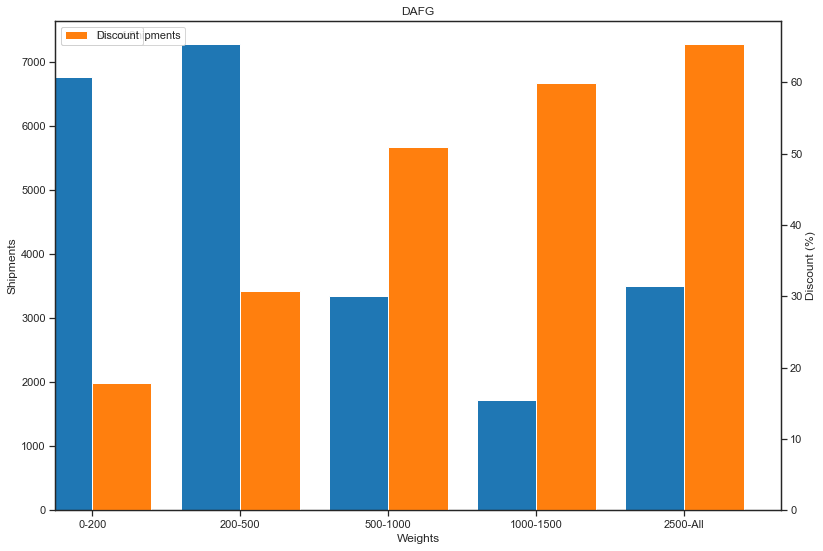

In [28]:
fig, ax = plt.subplots(figsize=(13, 9))
weight_bins["Shipments"].plot(kind='bar', color='tab:blue', width=0.4, position=1 ,ax=ax, rot=0, label='No. of Shipments')
ax1 = ax.twinx()
weight_bins["Discount (%)"].plot(kind='bar', color='tab:orange', width=0.4, position=0 ,ax=ax1, rot=0, label='Discount')
ax.set_ylabel('Shipments');
ax1.set_ylabel('Discount (%)');
ax.set_title("DAFG")
ax.legend(loc=2);
ax1.legend();
# plt.savefig('Charts-2/discount.png');

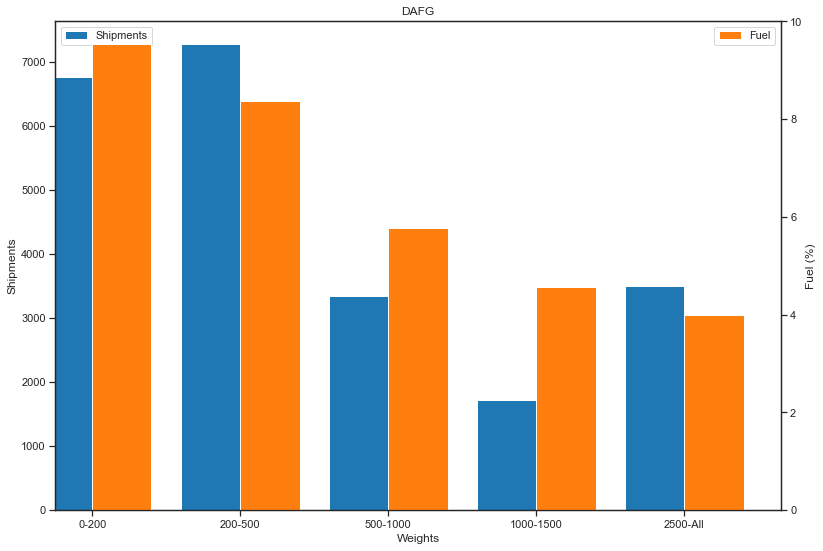

In [29]:
fig, ax = plt.subplots(figsize=(13, 9))
weight_bins["Shipments"].plot(kind='bar', color='tab:blue', width=0.4, position=1 ,ax=ax, rot=0, label='Shipments')
ax1 = ax.twinx()
weight_bins["Fuel (%)"].plot(kind='bar', color='tab:orange', width=0.4, position=0 ,ax=ax1, rot=0, label='Fuel')
ax.set_ylabel('Shipments');
ax1.set_ylabel('Fuel (%)');
ax.set_title("DAFG")
ax.legend(loc=2);
ax1.legend();
# plt.savefig('Charts-2/fuel.png');

# Carrier Options

In [65]:
def carrier_op(carrier, n):
    
    shipment = pd.read_csv('FreightShipmentDetails(All).csv')
    shipment['miles'] = shipment['miles'].astype('float64')
    shipment["Class"].fillna("50", inplace=True)

    shipment.head(10)

    shipment["PickupDate"] = pd.to_datetime(shipment["PickupDate"])
    if carrier in shipment["CarrierCode"].values:
        exla_shipment = shipment[shipment["CarrierCode"] == carrier]
        exla = exla_shipment.groupby("TOTALWEIGHT").aggregate({'TOTALWEIGHT': 'count', 'BuyFreight': 'sum', 
                                                        'BuyDiscount': 'sum', 'BuyFule': 'sum'})
        exla.rename(columns={'TOTALWEIGHT': 'Shipments'}, inplace=True)

        weight_bins = segment_df(exla)
        weight_bins = weight_bins.reset_index().rename(columns={'index': 'Weights'})
        weight_bins.set_index('Weights', inplace=True)


        if n == 1:
            fig, ax = plt.subplots(figsize=(13, 9))
            weight_bins["Shipments"].plot(kind='bar', color='tab:blue', width=0.4, position=1 ,ax=ax, rot=0, label='No. of Shipments')
            ax1 = ax.twinx()
            weight_bins["Discount (%)"].plot(kind='bar', color='tab:orange', width=0.4, position=0 ,ax=ax1, rot=0, label='Discount')
            ax.set_ylabel('Shipments');
            ax1.set_ylabel('Discount (%)');
            ax.set_title(carrier)
            ax.legend(loc=2);
            ax1.legend();
            plt.savefig('Charts-2/d3.png');

        if n == 2:
            fig, ax = plt.subplots(figsize=(13, 9))
            weight_bins["Shipments"].plot(kind='bar', color='tab:blue', width=0.4, position=1 ,ax=ax, rot=0, label='No. of Shipments')
            ax1 = ax.twinx()
            weight_bins["Fuel (%)"].plot(kind='bar', color='tab:orange', width=0.4, position=0 ,ax=ax1, rot=0, label='Fuel')
            ax.set_ylabel('Shipments');
            ax1.set_ylabel('Fuel (%)');
            ax.set_title(carrier)
            ax.legend(loc=2);
            ax1.legend();
            plt.savefig('Charts-2/f3.png');
    else:
        print("No such carrier found")

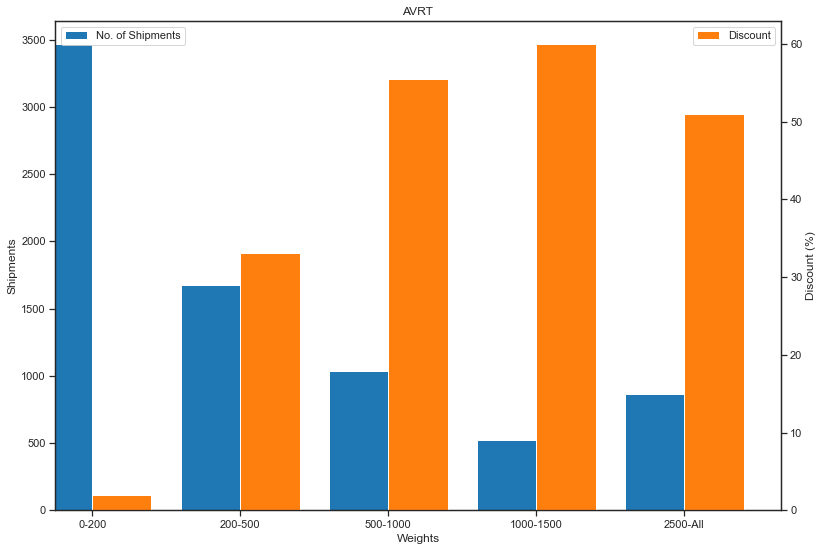

In [66]:
carrier_op("AVRT", 1)

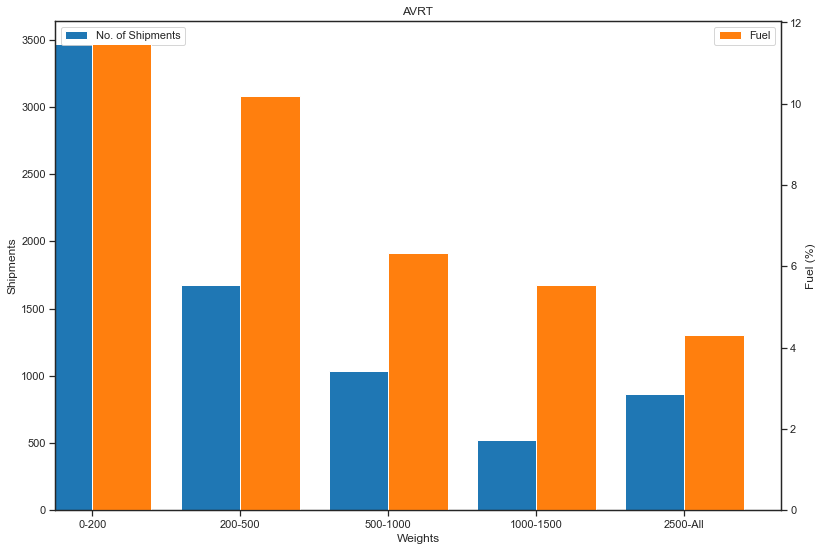

In [67]:
carrier_op("AVRT", 2)

# Class

In [38]:
shipment = pd.read_csv('FreightShipmentDetails(All).csv')
shipment['miles'] = shipment['miles'].astype('float64')
shipment["Class"].fillna("50", inplace=True)
shipment["PickupDate"] = pd.to_datetime(shipment["PickupDate"])
shipment.head(10)

C:\Users\jayth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ClientLadingNo,PickupDate,TOTALWEIGHT,status,TotalSellCost,TotalBuyCost,BuyFreight,BuyDiscount,BuyFule,CarrierCode,miles,Class
0,FRH30142,2019-01-01,218,6,135.12,135.12,157.03,-81.03,9.12,MTVL,0.0,85
1,FRH34471,2019-01-01,1,6,750.00,750.00,750.00,0.00,0.00,APGH,0.0,92
2,FRH35213,2019-01-01,18,6,46.87,46.87,46.87,0.00,0.00,FDEX,0.0,60
3,FRH35204,2019-01-01,531,6,300.84,300.84,300.84,0.00,0.00,FDEX,0.0,60
4,FRH35211,2019-01-01,366,6,302.09,302.09,302.09,0.00,0.00,FDEX,0.0,60
5,FRH41019,2019-01-01,1,6,450.00,450.00,450.00,0.00,0.00,APGH,0.0,92
6,FRH45985,2019-01-01,10000,6,1222.50,1222.50,1222.50,0.00,0.00,TXDT,0.0,92
7,FRH30819,2019-01-02,1323,6,99.74,99.74,275.98,-188.49,12.25,PITD,0.0,60
8,FRH30822,2019-01-02,8505,6,303.27,303.27,803.72,-537.69,37.24,PITD,0.0,100
9,FRH31370,2019-01-02,2946,6,196.60,196.60,511.72,-337.74,22.62,DAFG,0.0,60


In [34]:
shipment['Class'] = shipment['Class'].astype('object')

In [40]:
shipment["Class"].value_counts()

50       21328
55       17150
60.0     14286
70       13386
85       11659
85.0     11288
92       11106
60       10180
50.0      8869
125       8473
92.0      8350
65        6014
70.0      5836
55.0      5099
65.0      5044
250       2513
200       1723
175       1718
100       1627
250.0     1265
125.0     1232
300       1088
200.0     1052
100.0      950
175.0      923
150        886
300.0      486
RAFM       464
150.0      417
77         288
77.0       272
110         98
400         69
DEF         63
110.0       51
DFXP        36
400.0       26
WIC          8
HMF          6
FS           5
REWFE        5
RULE         5
AS           4
RESID        3
500          3
RECV         3
WNR          2
DFTP         1
LIMIT        1
Name: Class, dtype: int64

In [41]:
shipment[shipment["Class"] == 'DFXP']

,ClientLadingNo,PickupDate,TOTALWEIGHT,status,TotalSellCost,TotalBuyCost,BuyFreight,BuyDiscount,BuyFule,CarrierCode,miles,Class
75649,FRI14484,2019-10-23,590,6,975.0,975.0,975.0,0.0,0.0,DAFG,0.0,DFXP
78717,FRI18154,2019-11-04,800,6,850.0,850.0,850.0,0.0,0.0,DAFG,0.0,DFXP
79005,FRI16717,2019-11-05,800,6,875.0,875.0,875.0,0.0,0.0,DAFG,0.0,DFXP
85231,FRI23032,2019-12-03,2000,6,850.0,850.0,850.0,0.0,0.0,DAFG,0.0,DFXP
87693,FRI25680,2019-12-12,500,6,515.0,515.0,515.0,0.0,0.0,DAFG,0.0,DFXP
96520,FRI39147,2020-01-23,570,6,850.0,850.0,850.0,0.0,0.0,DAFG,0.0,DFXP
99931,FRI38390,2020-02-06,800,6,925.0,925.0,925.0,0.0,0.0,DAFG,0.0,DFXP
108525,FRI52524,2020-03-10,722,6,3500.0,3500.0,3500.0,0.0,0.0,DAFG,0.0,DFXP
115081,FRI53947,2020-04-05,1500,6,775.0,775.0,775.0,0.0,0.0,DAFG,0.0,DFXP
115215,FRI53948,2020-04-06,1500,6,775.0,775.0,775.0,0.0,0.0,DAFG,0.0,DFXP


In [36]:
shipment.groupby("Class").aggregate({'Class': 'count', 'BuyDiscount': 'sum'})

,Class,BuyDiscount
Class,,
50.0,8869,-998971.24
55.0,5099,-922656.62
60.0,14286,-2044040.09
65.0,5044,-349504.79
70.0,5836,-1040758.56
77.0,272,-55408.49
85.0,11288,-1516215.82
92.0,8350,-213103.77
100.0,950,-190305.30
